In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston

In [2]:
from pylab import *
from sklearn.metrics import confusion_matrix ,accuracy_score

In [30]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression ,ElasticNetCV ,ElasticNet

In [4]:
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
bos = pd.DataFrame(boston.data,columns=boston.feature_names)
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [6]:
bos['PRICE']=boston.target
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [7]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


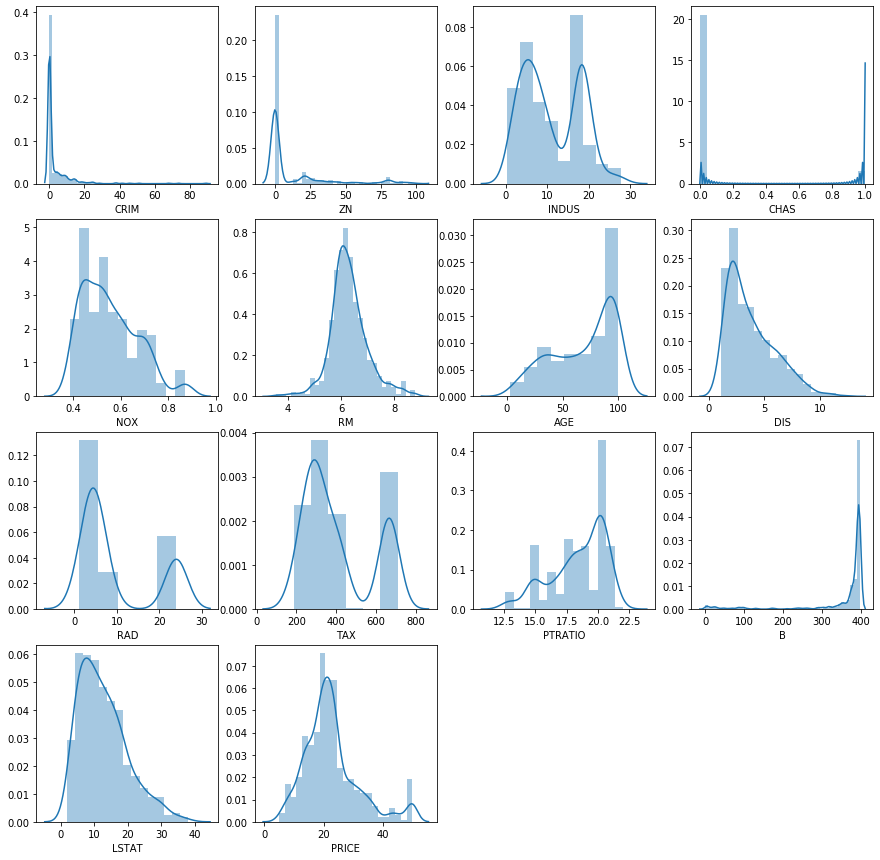

In [8]:
plt.figure(figsize=(15,15))
pt = 1
for i in bos:
    if pt <= 14:
        plt.subplot(4,4,pt)
        sns.distplot(bos[i])
        plt.xlabel(i)
    pt+=1
plt.show()    

In [9]:
#Treating outliers

bos['CRIM']=np.log(bos['CRIM'])

# q = bos['CRIM'].quantile(.90)
# data_cleaned = bos[bos['CRIM'] < q]

# print('The value of q is: ',q)
# data_cleaned.describe()

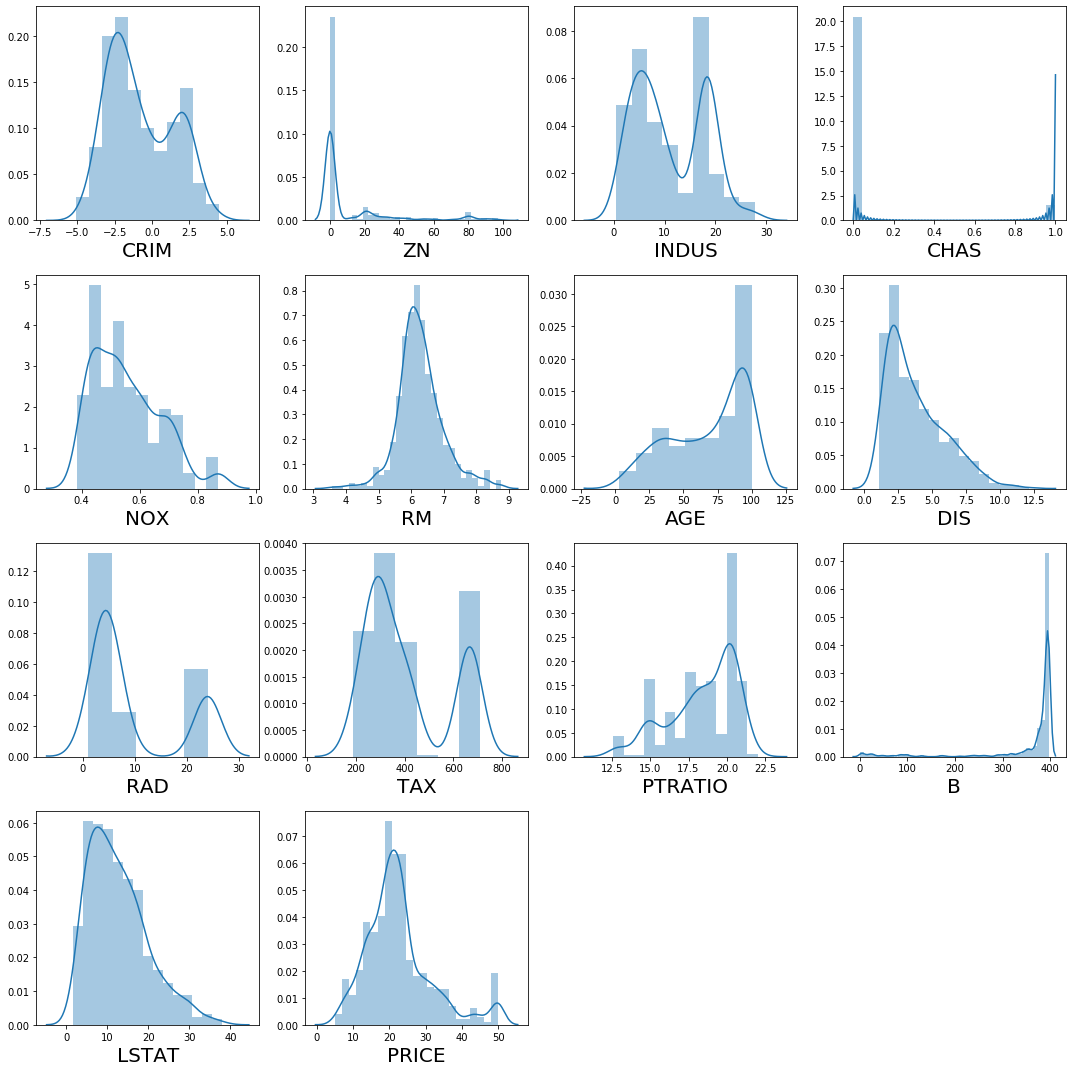

In [10]:
#After Removinng skewness
plt.figure(figsize=(15,15), facecolor='white')
pt = 1

for i in bos:
    if pt<=14 :
        ax = plt.subplot(4,4,pt)
        sns.distplot(bos[i])
        plt.xlabel(i,fontsize=20)
    pt+=1
plt.tight_layout()

In [111]:
# correlation_matrix = bos.corr().round(2)
# figure(figsize=(11,11))
# sns.heatmap(data=correlation_matrix, annot=True,square=True)

In [11]:
x=bos.drop(['PRICE'],axis=1)
y=bos['PRICE']
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-5.064036,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,-3.600502,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,-3.601235,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,-3.430523,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,-2.672924,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-2.770511,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,-3.095111,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,-2.800824,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,-2.211009,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


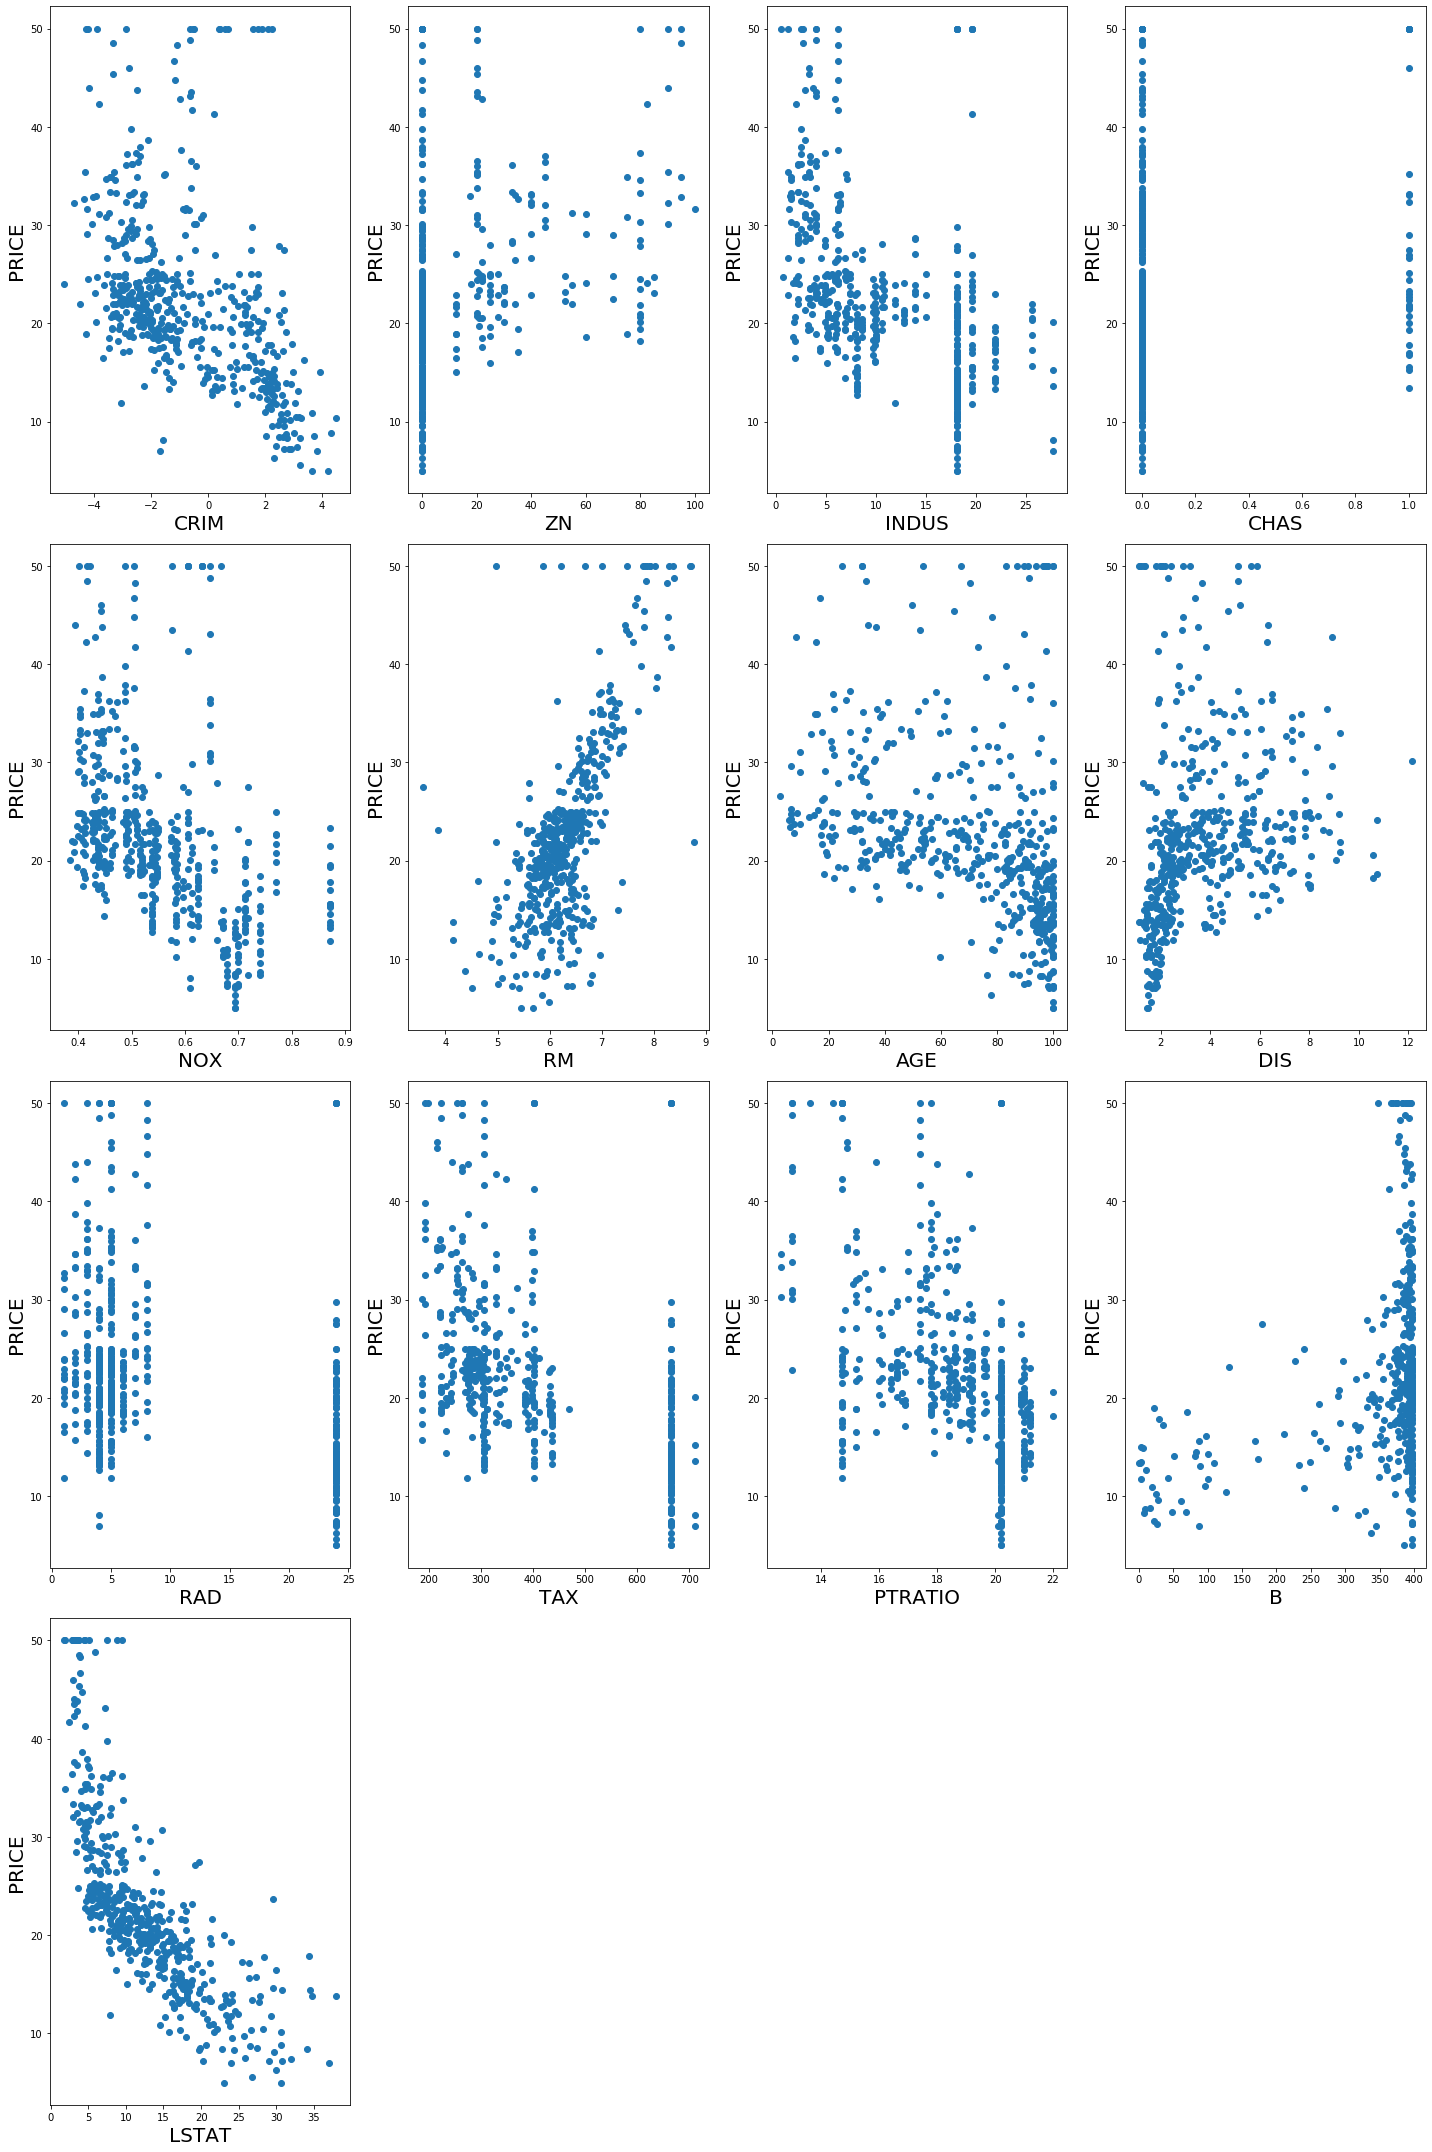

In [12]:
plt.figure(figsize=(20,30), facecolor='white')
pt = 1

for i in x:
    if pt<=13 :
        ax = plt.subplot(4,4,pt)
        plt.scatter(x[i],y)
        plt.xlabel(i,fontsize=20)
        plt.ylabel('PRICE',fontsize=20)
    pt+=1
plt.tight_layout()

In [13]:
scaler =StandardScaler()
X_scaled = scaler.fit_transform(x)

In [14]:
X_scaled

array([[-1.98322812,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-1.30563886, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-1.30597804, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.93540227, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.662329  , -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-1.05026732, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = x.columns

In [16]:
print('The min value and its featrure name is: ',vif["VIF"].min())
vif

The min value and its featrure name is:  1.0713444002828054


,VIF,Features
0,7.991491,CRIM
1,2.398781,ZN
2,4.018445,INDUS
3,1.071344,CHAS
4,4.687068,NOX
5,1.932468,RM
6,3.149461,AGE
7,3.905022,DIS
8,9.693251,RAD
9,9.010564,TAX


In [22]:
#Here v can see CRIM ,RAD,TAX are highy correlated
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [17]:
X_new=pd.DataFrame(X_scaled,columns=x.columns).drop(columns=['CRIM','RAD','TAX'])
print('The shape of x is: ',X_new.shape)
print('The shape of y is: ',y.shape)
X_new

The shape of x is:  (506, 10)
The shape of y is:  (506,)


,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT
0,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-1.459000,0.441052,-1.075562
1,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.303094,0.441052,-0.492439
2,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.303094,0.396427,-1.208727
3,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,0.113032,0.416163,-1.361517
4,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...
501,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,1.176466,0.387217,-0.418147
502,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,1.176466,0.441052,-0.500850
503,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,1.176466,0.441052,-0.983048
504,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,1.176466,0.403225,-0.865302


In [18]:
x_train,x_test,y_train,y_test = train_test_split(X_new,y,test_size = 0.25,random_state=355)

In [19]:
regression = LinearRegression()
regression.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
print('The coefficent is: ',regression.coef_)
print('The intercept is: ',regression.intercept_)

The coefficent is:  [ 0.98540083 -0.58625113  1.08475617 -1.71886648  3.24014723 -0.49048554
 -3.12433041 -1.70876035  0.7297044  -3.04890673]
The intercept is:  22.516867256231865


In [21]:
regression.score(x_train,y_train)

0.7208554480919469

In [22]:
regression.score(x_test,y_test)

0.728145940955703

In [23]:
y_pred= regression.predict(x_test)

In [32]:
# Now we will see if our data is overfitted or fine with the help of stats

In [24]:
#Refernce will be 
x_sam= pd.DataFrame(X_new,columns=X_new.columns)
x_sam['PRICE']=y
x_sam

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT,PRICE
0,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-1.459000,0.441052,-1.075562,24.0
1,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.303094,0.441052,-0.492439,21.6
2,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.303094,0.396427,-1.208727,34.7
3,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,0.113032,0.416163,-1.361517,33.4
4,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,0.113032,0.441052,-1.026501,36.2
...,...,...,...,...,...,...,...,...,...,...,...
501,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,1.176466,0.387217,-0.418147,22.4
502,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,1.176466,0.441052,-0.500850,20.6
503,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,1.176466,0.441052,-0.983048,23.9
504,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,1.176466,0.403225,-0.865302,22.0


In [25]:
# Will check from stats perspective too
import statsmodels.formula.api as smf
regression1 = smf.ols(formula='PRICE ~ ZN+INDUS+CHAS+NOX+RM+AGE+DIS+PTRATIO+B+LSTAT', data=x_sam).fit()
regression1.conf_int()

# The coefficent is:  [ 0.98540083 -0.58625113  1.08475617 -1.71886648  3.24014723 -0.49048554
#  -3.12433041 -1.70876035  0.7297044  -3.04890673]
# The intercept is:  22.516867256231865

,0,1
Intercept,22.108873,22.956740
ZN,0.256335,1.486718
INDUS,-1.072877,0.438879
CHAS,0.367229,1.238382
NOX,-2.599773,-0.931704
RM,2.294420,3.453352
AGE,-0.836434,0.649582
DIS,-3.856307,-2.184407
PTRATIO,-2.359157,-1.338548
B,0.372064,1.325027


In [26]:
# print('The value of pvalues:',lm.pvalues)
# print('The value of rsquared is: ',lm.rsquared)
# print('The value of Adjusted rsquared is: ',lm.rsquared_adj)
regression1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     131.8
Date:                Sat, 06 Mar 2021   Prob (F-statistic):          1.27e-132
Time:                        20:48:01   Log-Likelihood:                -1511.8
No. Observations:                 506   AIC:                             3046.
Df Residuals:                     495   BIC:                             3092.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5328      0.216    104.431      0.000      22.109      22.957
ZN             0.8715      0.313      2.783      0.006       0.256       1.487
INDUS         -0.3170      0.385     -0.824      0.410      -1.073       0.439
CHAS           0.8028      0.222      3.621      0.000       0.367       1.238
NOX           -1.7657      0.424     -4.160      0.000      -2.600      -0.932
RM             2.8739      0.295      9.744      0.000       2.294       3.453
AGE           -0.0934      0.378     -0.247      0.805      -0.836       0.650
DIS           -3.0204      0.425     -7.099      0.000      -3.856      -2.184
PTRATIO       -1.8489      0.260     -7.118      0.000      -2.359      -1.339
B              0.8485      0.243      3.499      0.001       0.372       1.325
LSTAT         -3.8183      0.363    -10.511      0.000      -4.532      -3.105
==============================================================================
Omnibus:                      181.914   Durbin-Watson:                   1.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              865.079
Skew:                           1.528   Prob(JB):                    1.41e-188
Kurtosis:                       8.630   Cond. No.                         5.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Will check Regularization now

In [27]:
elasticCV = ElasticNetCV(alphas = None, cv =10)
elasticCV.fit(x_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [28]:
print('The alpha of Elastic CV is: ',elasticCV.alpha_)
print('The ratio of l1 will be: ',elasticCV.l1_ratio)

The alpha of Elastic CV is:  0.02659852234919672
The ratio of l1 will be:  0.5


In [31]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.02659852234919672, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [32]:
elasticnet_reg.score(x_test, y_test)

0.7277223959727821

In [33]:
regression.score(x_test,y_test)

0.728145940955703

In [42]:
# From here v can say our model is not overfitted one